# Implementing the Kalman Model on random data 

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood

In [3]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            # "Please fill this part."
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    
            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
     
        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])
    
    u_smooth = u_smooth[0:-1]
    return u_smooth

In [4]:
amzn = pd.read_csv("AMZN.csv")
amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
amzn.head()

,Date,Open,Close,High,Low,Volume,Typical_Price,lrets
0,2016-01-04,656.289978,636.989990,657.719971,627.510010,9314500,640.739990,NaN
1,2016-01-05,646.859985,633.789978,646.909973,627.650024,5822600,636.116658,-0.503631
2,2016-01-06,622.000000,632.650024,639.789978,620.309998,5329200,630.916667,-0.180025
3,2016-01-07,621.799988,607.940002,630.000000,605.210022,7074900,614.383341,-3.984119
4,2016-01-08,619.659973,607.049988,624.140015,606.000000,5512900,612.396668,-0.146506


/Users/dreamfires/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


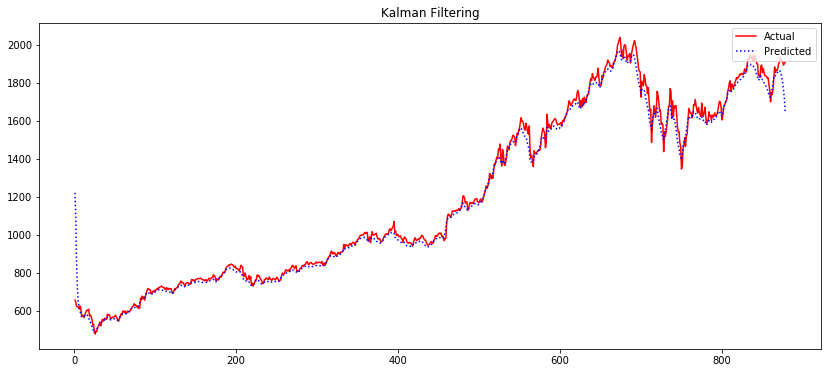

In [5]:
Y = amzn['Open']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

/Users/dreamfires/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


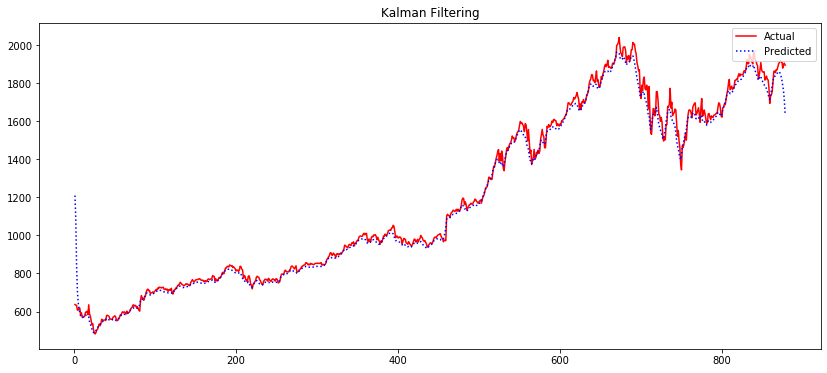

In [6]:
Y = amzn['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

In [7]:
results = pd.DataFrame({'Actual': list(Y),
                  'Predicted' : list(u),
                  'Date':amzn['Date'],
                  'Open':amzn['Open'],
                  'Close':amzn['Close']
                       })


In [8]:
results.set_index('Date',inplace = True)
results.head(10)

,Actual,Predicted,Open,Close
Date,,,,
2016-01-04,636.989990,1209.211922,656.289978,636.989990
2016-01-05,633.789978,1089.768655,646.859985,633.789978
2016-01-06,632.650024,841.790046,622.000000,632.650024
2016-01-07,607.940002,708.527672,621.799988,607.940002
2016-01-08,607.049988,646.379101,619.659973,607.049988
2016-01-11,617.739990,615.485064,612.479980,617.739990
2016-01-12,617.890015,594.158485,625.250000,617.890015
2016-01-13,581.809998,576.568643,620.880005,581.809998
2016-01-14,593.000000,573.710622,580.250000,593.000000


# Long Short Day trading:
* if predicted > yesterdays close, buy and sell at end of day

* if predicted < yesterdays close, sell and buy at end of day

In [9]:
amount = 10000
signal = 0
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []

for i in range(len(results)):
    if results['Predicted'][i] > results['Actual'][i-1]:
        action.append('Buy at Open')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Buy at Open',round(portfolio,2),stocks,round(balance,2))
        
        
        action.append('Sell at End')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Sell at Close',round(amount,2),balance)
        Amount.append(amount)
        
    else:
        action.append('Sell at Open')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Sell at Open',round(portfolio,2),'-',stocks,round(balance,2))
        
        
        action.append('Buy at Close')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Buy Back at Close',round(amount,2),balance)
        Amount.append(amount)
    print('\n')
        

0 Sell at Open 9844.35 - 15 445
0 Buy Back at Close 9999.85 0


1 Buy at Open 9702.9 15 493
1 Sell at Close 9999.85 0


2 Buy at Open 9952.0 16 510
2 Sell at Close 10632.4 0


3 Buy at Open 10570.6 17 297
3 Sell at Close 10631.98 0


4 Buy at Open 10534.22 17 312
4 Sell at Close 10631.85 0


5 Buy at Open 10412.16 17 130
5 Sell at Close 10631.58 0


6 Sell at Open 10629.25 - 17 127
6 Buy Back at Close 10631.13 0


7 Sell at Open 10554.96 - 17 158
7 Buy Back at Close 10048.77 0


8 Sell at Open 9864.25 - 17 560
8 Buy Back at Close 10641.0 0


9 Sell at Open 10300.32 - 18 377
9 Buy Back at Close 10640.24 0


10 Sell at Open 10387.62 - 18 299
10 Buy Back at Close 10639.64 0


11 Sell at Open 10158.48 - 18 347
11 Buy Back at Close 10638.86 0


12 Buy at Open 10324.44 18 288
12 Sell at Close 10638.36 0


13 Buy at Open 10597.14 18 499
13 Sell at Close 11233.84 0


14 Sell at Open 10763.82 - 18 496
14 Buy Back at Close 11233.54 0


15 Sell at Open 10862.1 - 18 411
15 Buy Back at Close 11233.

178 Buy at Open 10825.92 14 340
178 Sell at Close 11239.28 0


179 Sell at Open 10919.58 - 14 387
179 Buy Back at Close 11238.4 0


180 Buy at Open 10864.0 14 315
180 Sell at Close 11238.08 0


181 Buy at Open 10965.5 14 181
181 Sell at Close 11237.36 0


182 Buy at Open 11119.78 14 776
182 Sell at Close 12041.8 0


183 Sell at Open 11243.82 - 14 761
183 Buy Back at Close 12041.5 0


184 Sell at Open 12027.0 - 15 54
184 Buy Back at Close 12041.4 0


185 Buy at Open 12027.75 15 615
185 Sell at Close 12856.65 0


186 Buy at Open 12270.0 15 425
186 Sell at Close 12855.8 0


187 Sell at Open 12423.9 - 15 420
187 Buy Back at Close 12855.75 0


188 Sell at Open 12489.15 - 15 296
188 Buy Back at Close 12855.65 0


189 Sell at Open 12540.0 - 15 304
189 Buy Back at Close 12855.1 0


190 Sell at Open 12613.65 - 15 344
190 Buy Back at Close 12854.45 0


191 Sell at Open 12570.0 - 15 189
191 Buy Back at Close 12854.4 0


192 Sell at Open 12655.5 - 15 229
192 Buy Back at Close 12853.9 0


193 Sell 



317 Sell at Open 10965.6 - 12 687
317 Buy Back at Close 11466.36 0


318 Sell at Open 10795.8 - 12 727
318 Buy Back at Close 11465.56 0


319 Sell at Open 10795.56 - 12 581
319 Buy Back at Close 11465.48 0


320 Sell at Open 10884.48 - 12 637
320 Buy Back at Close 11465.32 0


321 Sell at Open 10837.08 - 12 710
321 Buy Back at Close 11464.76 0


322 Sell at Open 10697.4 - 12 848
322 Buy Back at Close 11464.04 0


323 Buy at Open 10650.0 12 640
323 Sell at Close 11463.88 0


324 Sell at Open 10811.88 - 12 618
324 Buy Back at Close 11463.36 0


325 Sell at Open 10894.08 - 12 672
325 Buy Back at Close 11462.4 0


326 Sell at Open 10796.4 - 12 637
326 Buy Back at Close 11461.72 0


327 Sell at Open 10832.04 - 12 679
327 Buy Back at Close 11461.36 0


328 Buy at Open 10904.16 12 572
328 Sell at Close 11460.92 0


329 Sell at Open 10884.48 - 12 569
329 Buy Back at Close 11460.44 0


330 Buy at Open 10923.6 12 548
330 Sell at Close 11459.48 0


331 Buy at Open 10972.68 12 438
331 Sell at Cl

522 Buy Back at Close 8458.1 0


523 Sell at Open 7256.5 - 5 1203
523 Buy Back at Close 8457.45 0


524 Sell at Open 7225.0 - 5 117
524 Buy Back at Close 7067.0 0


525 Sell at Open 5909.56 - 4 1347
525 Buy Back at Close 7066.8 0


526 Sell at Open 7013.1 - 5 116
526 Buy Back at Close 7066.0 0


527 Sell at Open 6807.3 - 5 1294
527 Buy Back at Close 8508.2 0


528 Sell at Open 7245.0 - 5 7
528 Buy Back at Close 7090.9 0


529 Sell at Open 5718.72 - 4 338
529 Buy Back at Close 5740.0 0


530 Buy at Open 5493.96 4 381
530 Sell at Close 5739.4 0


531 Buy at Open 5458.68 4 194
531 Sell at Close 5738.92 0


532 Buy at Open 5543.72 4 80
532 Sell at Close 5738.04 0


533 Buy at Open 5625.0 4 1384
533 Sell at Close 7188.2 0


534 Sell at Open 5867.56 - 4 1341
534 Buy Back at Close 7188.04 0


535 Sell at Open 5829.48 - 4 1393
535 Buy Back at Close 7187.76 0


536 Buy at Open 5785.96 4 1314
536 Sell at Close 7187.4 0


537 Buy at Open 5940.0 4 1255
537 Sell at Close 7186.68 0


538 Sell at Ope

688 Sell at Open 1968.5 - 1 851
688 Buy Back at Close 2825.85 0


689 Sell at Open 1993.24 - 1 812
689 Buy Back at Close 2824.98 0


690 Sell at Open 2004.41 - 1 821
690 Buy Back at Close 2824.0 0


691 Sell at Open 2021.99 - 1 819
691 Buy Back at Close 2823.36 0


692 Sell at Open 1999.99 - 1 852
692 Buy Back at Close 2823.31 0


693 Sell at Open 1981.7 - 1 870
693 Buy Back at Close 2822.76 0


694 Sell at Open 1949.0 - 1 913
694 Buy Back at Close 2822.42 0


695 Sell at Open 1917.99 - 1 932
695 Buy Back at Close 2821.65 0


696 Sell at Open 1874.0 - 1 957
696 Buy Back at Close 2821.42 0


697 Sell at Open 1859.99 - 1 951
697 Buy Back at Close 2821.32 0


698 Sell at Open 1857.89 - 1 1066
698 Buy Back at Close 2821.25 0


699 Sell at Open 1724.0 - 1 1101
699 Buy Back at Close 2820.36 0


700 Buy at Open 1808.0 1 1031
700 Sell at Close 2819.61 0


701 Sell at Open 1795.0 - 1 1058
701 Buy Back at Close 2818.95 0


702 Sell at Open 1783.5 - 1 998
702 Buy Back at Close 2817.96 0


703 Sel

In [10]:
results['Amount'] = list(Amount)

In [11]:
results['Returns'] = results['Amount'].pct_change()

In [12]:
results.head()

,Actual,Predicted,Open,Close,Amount,Returns
Date,,,,,,
2016-01-04,636.989990,1209.211922,656.289978,636.989990,9999.849850,NaN
2016-01-05,633.789978,1089.768655,646.859985,633.789978,9999.849670,-1.800027e-08
2016-01-06,632.650024,841.790046,622.000000,632.650024,10632.400384,6.325602e-02
2016-01-07,607.940002,708.527672,621.799988,607.940002,10631.980034,-3.953482e-05
2016-01-08,607.049988,646.379101,619.659973,607.049988,10631.849796,-1.224965e-05


In [13]:
results.tail()

,Actual,Predicted,Open,Close,Amount,Returns
Date,,,,,,
2019-06-24,1913.900024,1815.324734,1912.660034,1913.900024,2831.900024,-0.000141
2019-06-25,1878.270020,1785.700365,1911.839966,1878.270020,2831.270020,-0.000222
2019-06-26,1897.829956,1758.574720,1892.479980,1897.829956,2830.829956,-0.000155
2019-06-27,1904.280029,1709.819072,1902.000000,1904.280029,2830.280029,-0.000194
2019-06-28,1893.630005,1635.343001,1909.099976,1893.630005,2829.630005,-0.000230


In [14]:
mean_returns = results['Returns'].mean()
sd = results['Returns'].std()
print(mean_returns,sd)
Market_RF = 0.0464


Sharpe_Ratio = np.sqrt(878)*(mean_returns)/sd
Sharpe_Ratio

-0.0002764545018687211 0.05113038874532628


-0.16021081502846093

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(results['Actual'], results['Predicted']))
rms

41.47427049927625